<a href="https://colab.research.google.com/github/vesyapdw/Endterm-Task-KI/blob/main/Endterm_KI_Vesya_Padmadewi_2106726926.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:00<00:00, 193MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


credit: https://www.kaggle.com/code/mohsenzergani/cnn-model-98-precision-in-brain-tumor-detection/notebook



# 1.1 What is a Brain Tumor?
A brain tumor refers to an abnormal collection or mass of cells within the brain. The skull, which encloses the brain, has limited space, and any growth within this confined area can lead to complications. Brain tumors can be either cancerous (malignant) or noncancerous (benign). As benign or malignant tumors grow, they can increase the pressure inside the skull. This elevated pressure can cause brain damage and pose a life-threatening risk.

1.1.1 The Importance of Brain Tumor Classification
The early detection and classification of brain tumors are crucial areas of research in medical imaging. Accurate classification aids in selecting the most suitable treatment method, potentially saving patients' lives.

# 1.1.2 Methods
The application of deep learning approaches in healthcare has yielded significant advancements in health diagnosis. According to the World Health Organization (WHO), effective brain tumor diagnosis involves detecting the tumor, identifying its location within the brain, and classifying it based on malignancy, grade, and type. This experimental work focuses on diagnosing brain tumors using Magnetic Resonance Imaging (MRI). The process entails tumor detection, classification by grade and type, and identification of the tumor's location. Instead of employing individual models for each classification task, this method utilizes a single model for classifying brain MRI images across different classification tasks. The classification and detection of tumors employ a Convolutional Neural Network (CNN)-based multi-task approach. Additionally, a CNN-based model is employed to segment the brain and identify the location of the tumor.

1.2 About the Dataset
This dataset is a compilation of three primary datasets: figshare, Br35H, and a removed source due to bad data.

# 1.2.1 Dataset Description
The dataset comprises a total of 7023 human brain MRI images, categorized into four distinct classes. The dataset focuses on brain tumors and their classification. The four classes are as follows:

Glioma: Cancerous brain tumors in glial cells.

Meningioma: Non-cancerous tumors originating from the meninges.

No Tumor: Normal brain scans without detectable tumors.

Pituitary: Tumors affecting the pituitary gland, which can be cancerous or non-cancerous.

Advancing the development of machine learning models for tumor classification is crucial for driving progress in the field of neurology and making a significant impact on the lives of individuals. These models have the potential to enhance medical research, improve diagnostic accuracy, and contribute to effective treatment strategies for various types of tumors. By leveraging machine learning techniques, we can significantly aid in the advancement of neurology and ultimately improve healthcare outcomes for people affected by tumors.

The "No Tumor" class images were obtained from the Br35H dataset.

Note: The images in this dataset have varying sizes. After pre-processing and removing excess margins, you can resize the images to the desired dimensions.



# Importing libraries & Setup

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from PIL import Image
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation  , Dropout , BatchNormalization

from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

# Importing Train & Test Data

In [3]:
train_data='/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training'
filepaths=[]
labels=[]

folds=os.listdir(train_data)

for fold in folds:
    foldpath=os.path.join(train_data,fold)
    filelist=os.listdir(foldpath)

    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)

        labels.append(fold)
        filepaths.append(fillpath)

file_series=pd.Series(filepaths,name='filepaths')
label_series=pd.Series(labels,name='labels')
train_df=pd.concat([file_series,label_series],axis=1)

In [4]:
train_df

filepaths     labels
0     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
1     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
2     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
3     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
4     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
...                                                 ...        ...
5707  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
5708  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
5709  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
5710  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
5711  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary

[5712 rows x 2 columns]

In [5]:
test_data='/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing'
filepaths=[]
labels=[]

folds=os.listdir(test_data)

for fold in folds:
    foldpath=os.path.join(test_data,fold)
    filelist=os.listdir(foldpath)

    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)

        labels.append(fold)
        filepaths.append(fillpath)

file_series=pd.Series(filepaths,name='filepaths')
label_series=pd.Series(labels,name='labels')
ts_df=pd.concat([file_series,label_series],axis=1)

In [6]:
ts_df

filepaths     labels
0     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
1     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
2     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
3     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
4     /root/.cache/kagglehub/datasets/masoudnickparv...     glioma
...                                                 ...        ...
1306  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1307  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1308  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1309  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1310  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary

[1311 rows x 2 columns]

# EDA

In [7]:
fig= px.histogram(data_frame= train_df,
           y= train_df['labels'],
           template='plotly_dark',
           color=train_df['labels'].values,
           title='number of images in each class of the train data')
fig.show()

In [8]:
fig= px.histogram(data_frame= ts_df,
           y= ts_df['labels'],
           template='plotly_dark',
           color=ts_df['labels'].values,
           title='number of images in each class of the test data')
fig.show()

****The number of images in testing of the no tumor is greater than the others but we can also say that the data images in almost equal in the numbers of each class****

# Splitting test data into validation and testing

In [9]:
val_df, test_df= train_test_split(ts_df,test_size=0.5,random_state= 43)

In [10]:
val_df

filepaths      labels
185   /root/.cache/kagglehub/datasets/masoudnickparv...      glioma
436   /root/.cache/kagglehub/datasets/masoudnickparv...  meningioma
1149  /root/.cache/kagglehub/datasets/masoudnickparv...   pituitary
999   /root/.cache/kagglehub/datasets/masoudnickparv...     notumor
671   /root/.cache/kagglehub/datasets/masoudnickparv...     notumor
...                                                 ...         ...
307   /root/.cache/kagglehub/datasets/masoudnickparv...  meningioma
16    /root/.cache/kagglehub/datasets/masoudnickparv...      glioma
58    /root/.cache/kagglehub/datasets/masoudnickparv...      glioma
277   /root/.cache/kagglehub/datasets/masoudnickparv...      glioma
255   /root/.cache/kagglehub/datasets/masoudnickparv...      glioma

[655 rows x 2 columns]

# Image data generator

In [11]:
batch_size = 16
image_size = (224, 224)

train_genrator = ImageDataGenerator()
test_genrator = ImageDataGenerator()


train_genrator = train_genrator.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_genrator = test_genrator.flow_from_dataframe( val_df, x_col= 'filepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_genrator = test_genrator.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= image_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


# Showing sample from train data

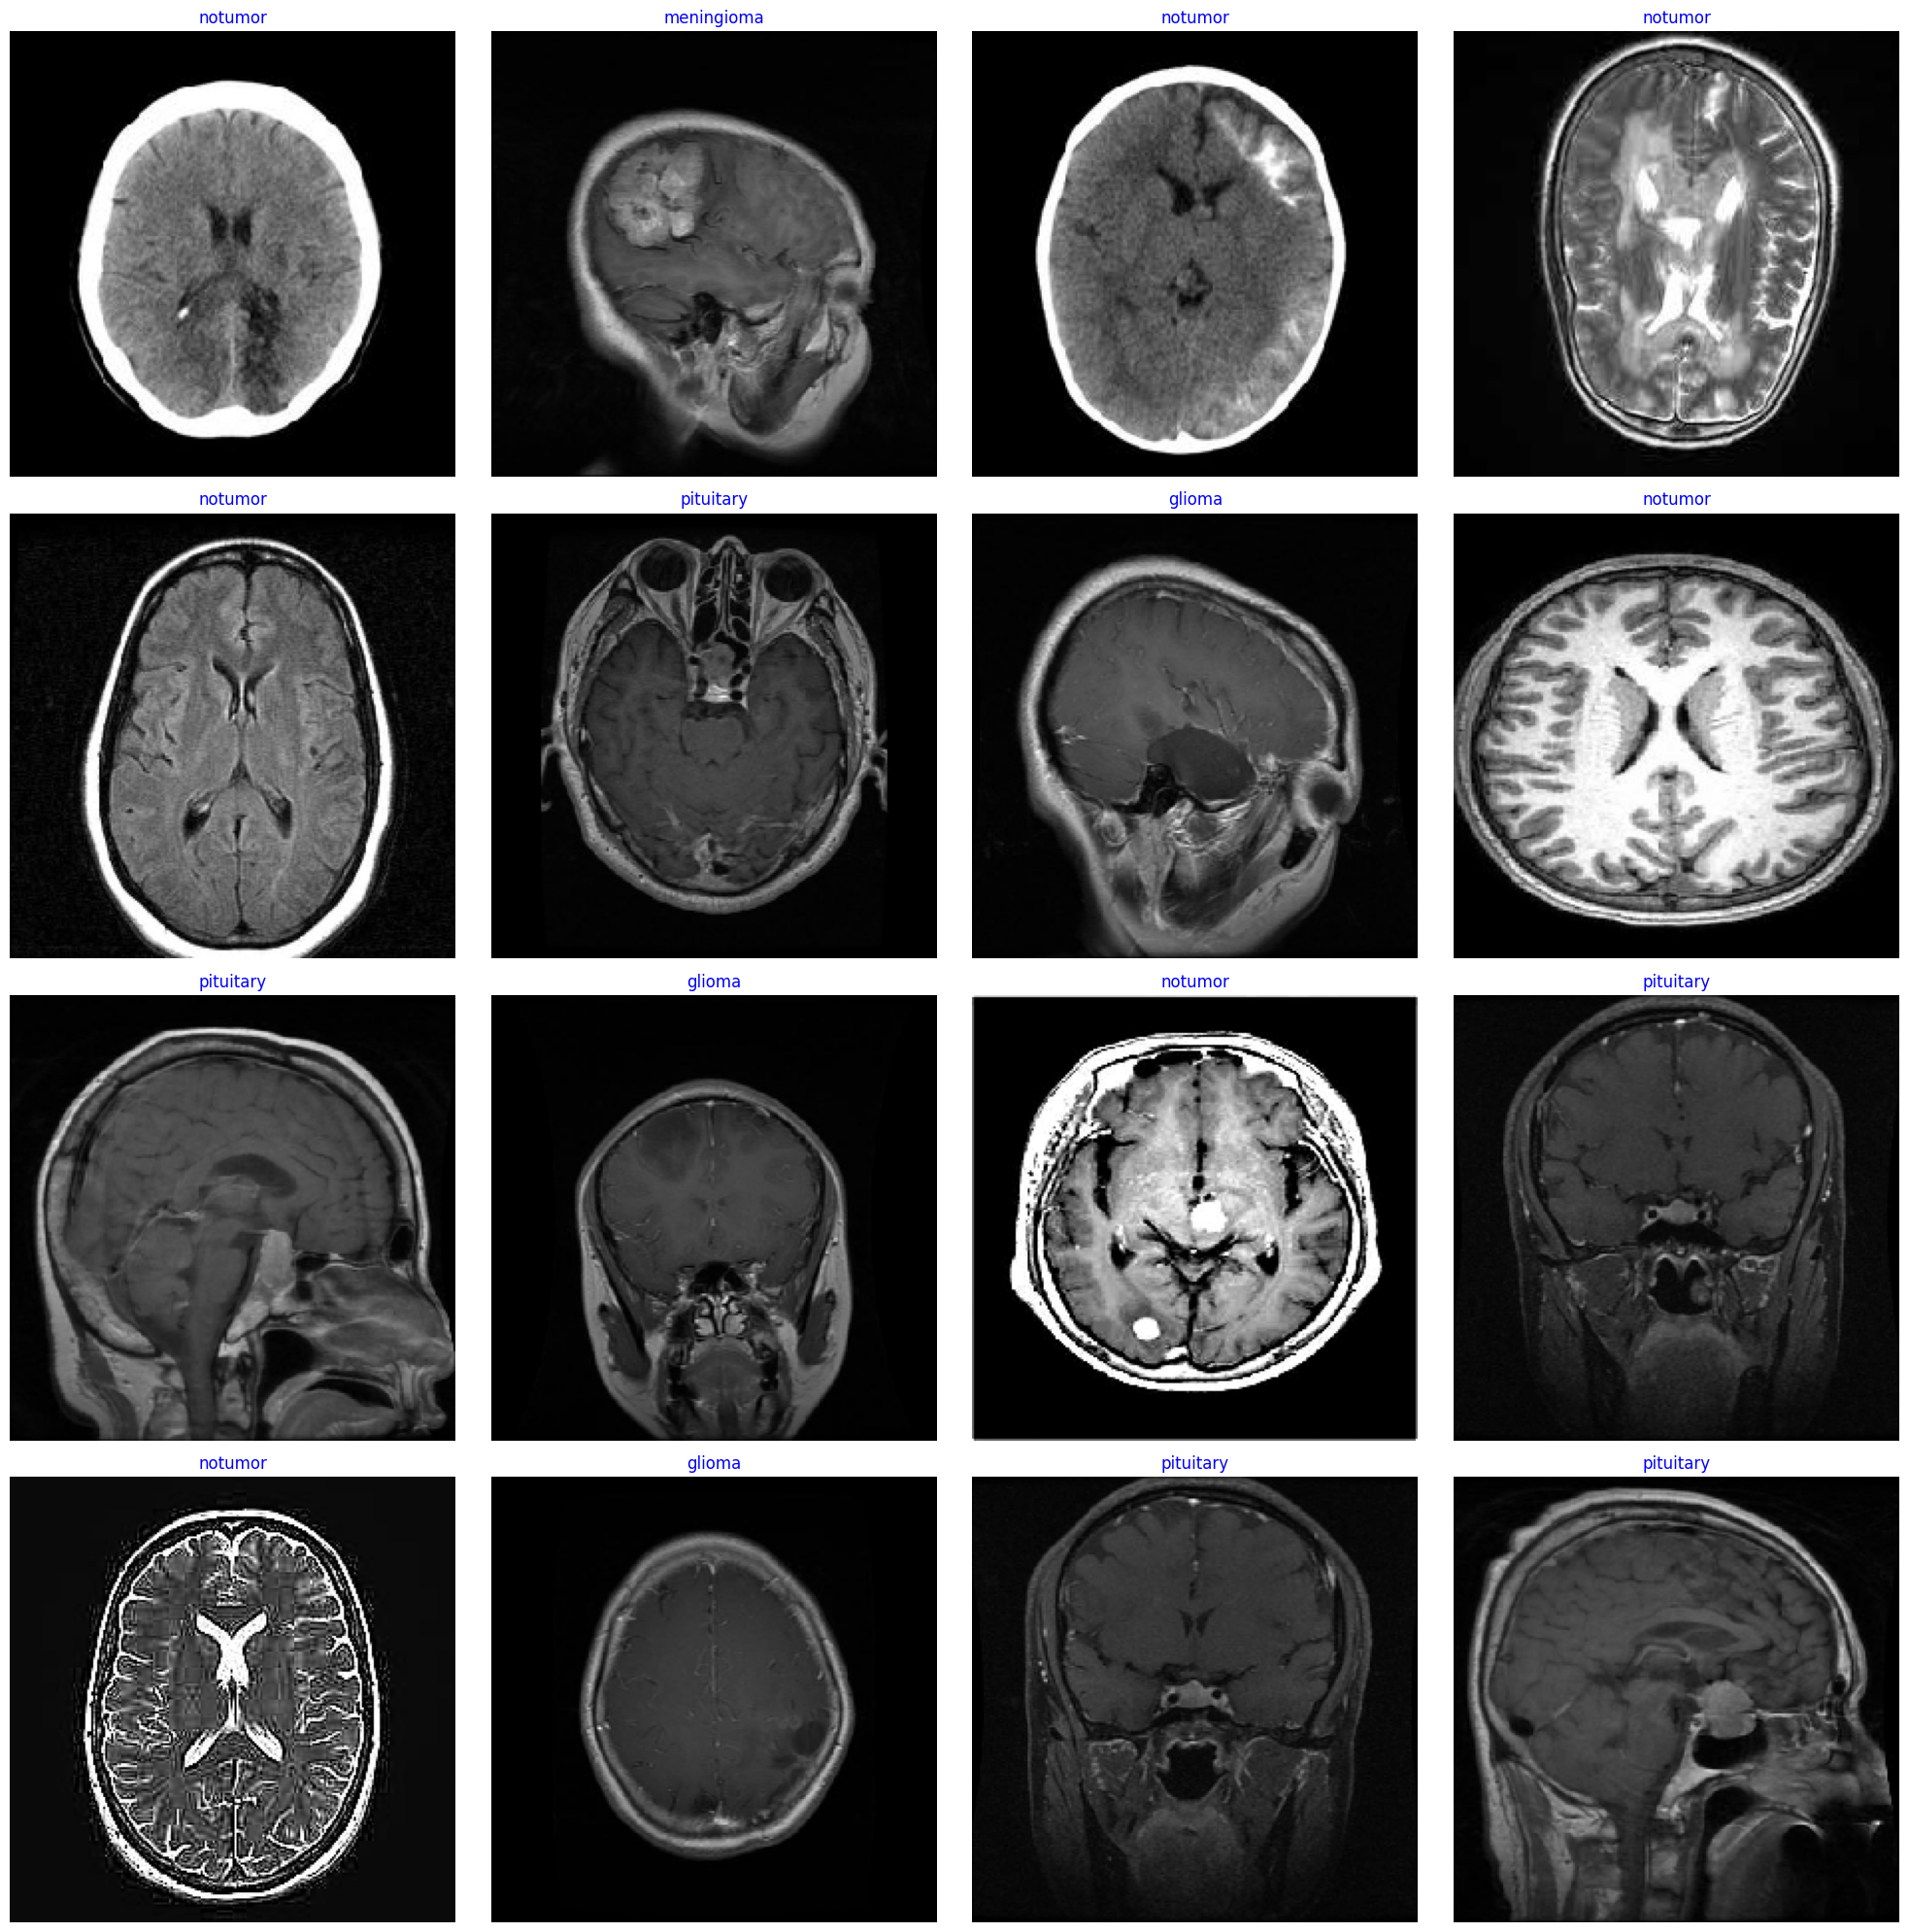

In [12]:
g_dict = train_genrator.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_genrator)      # get a batch size samples from the generator
# difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Model Structure

In [13]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_genrator.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,154,180 (80.70 MB)

 Trainable params: 21,154,180 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

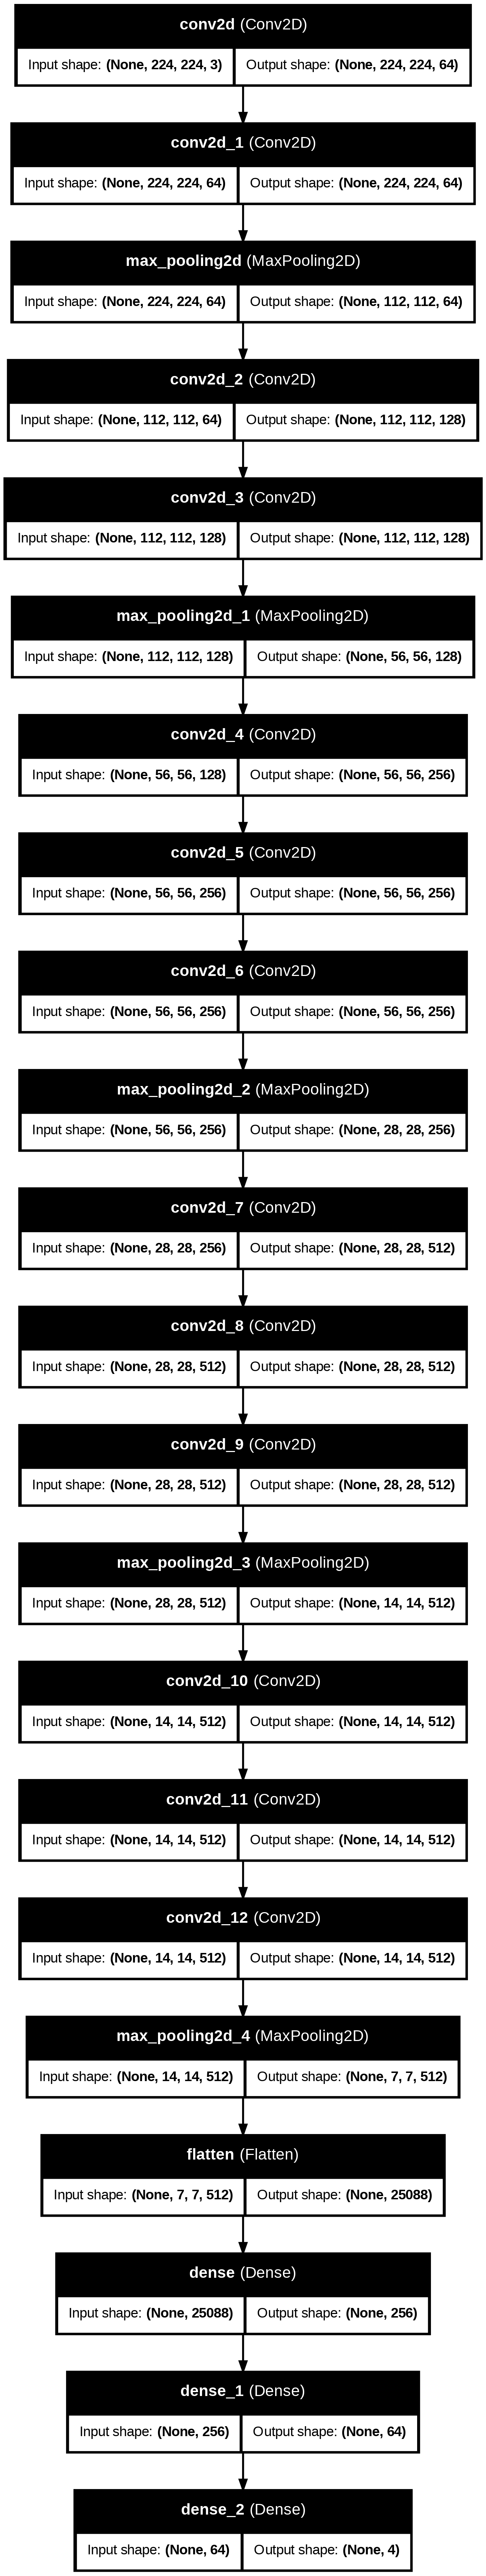

In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/' # Replace with your Graphviz bin path if different



from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model object
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)  # Save to file
# Display the image
from IPython.display import Image
Image(filename='model_diagram.png')

# Training model

In [15]:
history = model.fit(train_genrator, epochs= 10, verbose= 1, validation_data= valid_genrator, shuffle= False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.4540 - loss: 66.3357 - val_accuracy: 0.7542 - val_loss: 0.6329
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8107 - loss: 0.5073 - val_accuracy: 0.7847 - val_loss: 0.4920
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8673 - loss: 0.3697 - val_accuracy: 0.8550 - val_loss: 0.3857
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9076 - loss: 0.2538 - val_accuracy: 0.8763 - val_loss: 0.2856
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9398 - loss: 0.1660 - val_accuracy: 0.8901 - val_loss: 0.2705
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9517 - loss: 0.1325 - val_accuracy: 0.9344 - val_loss: 0.2086
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9618 - loss: 0.1076 - val_accuracy: 0.9084 - val_loss: 0.2707
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9809 - loss: 0.0634 -

# Visualize model performance

In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

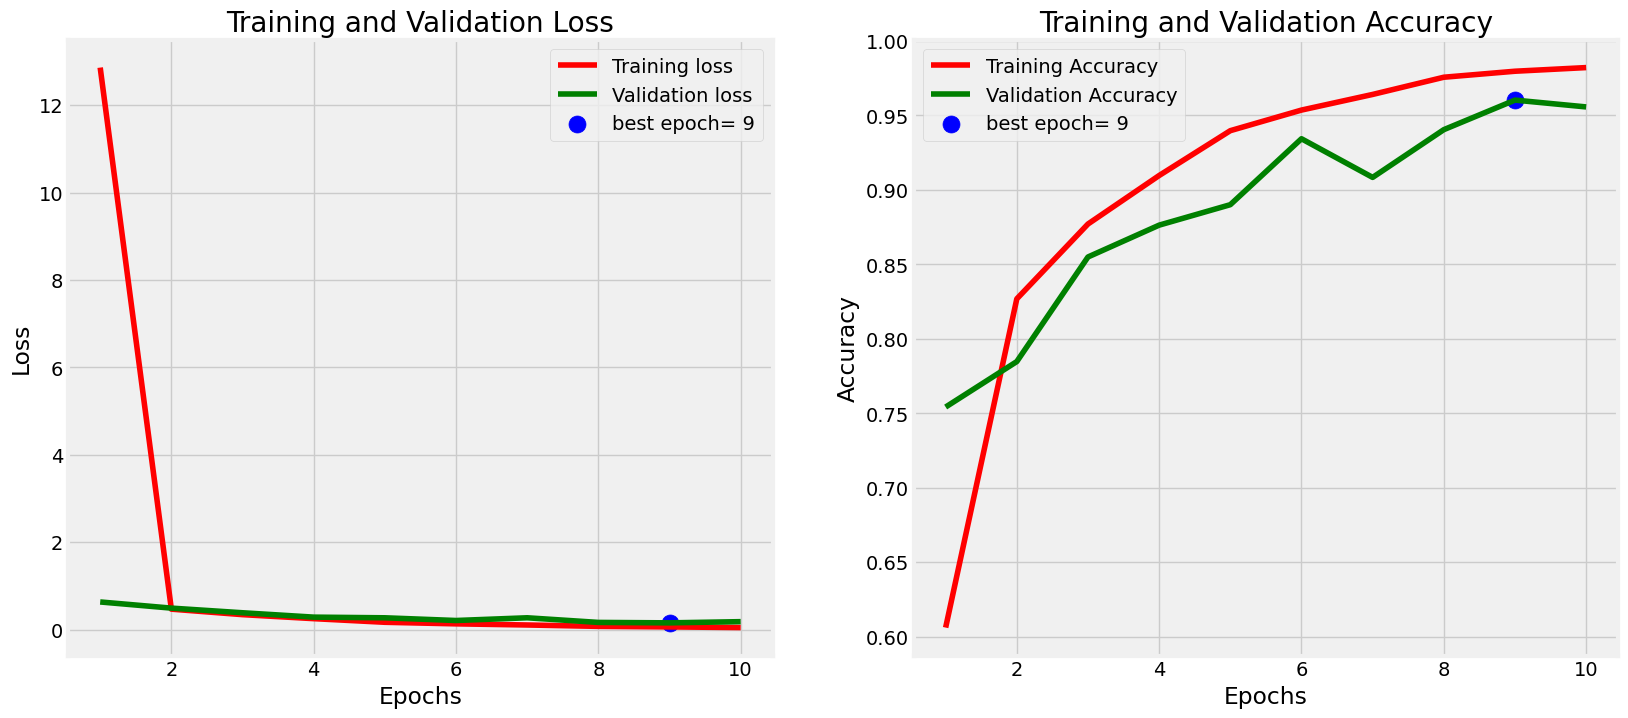

In [17]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate model

In [18]:
train_score = model.evaluate(train_genrator, verbose= 1)
valid_score = model.evaluate(valid_genrator, verbose= 1)
test_score = model.evaluate(test_genrator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9918 - loss: 0.0246
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9510 - loss: 0.1833
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9545 - loss: 0.2091
Train Loss:  0.023717179894447327
Train Accuracy:  0.9908963441848755
--------------------
Validation Loss:  0.18222647905349731
Validation Accuracy:  0.9557251930236816
--------------------
Test Loss:  0.20218904316425323
Test Accuracy:  0.9542682766914368


# Get Predictions

In [19]:
preds = model.predict(test_genrator)  # [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


 # Confusion matrix

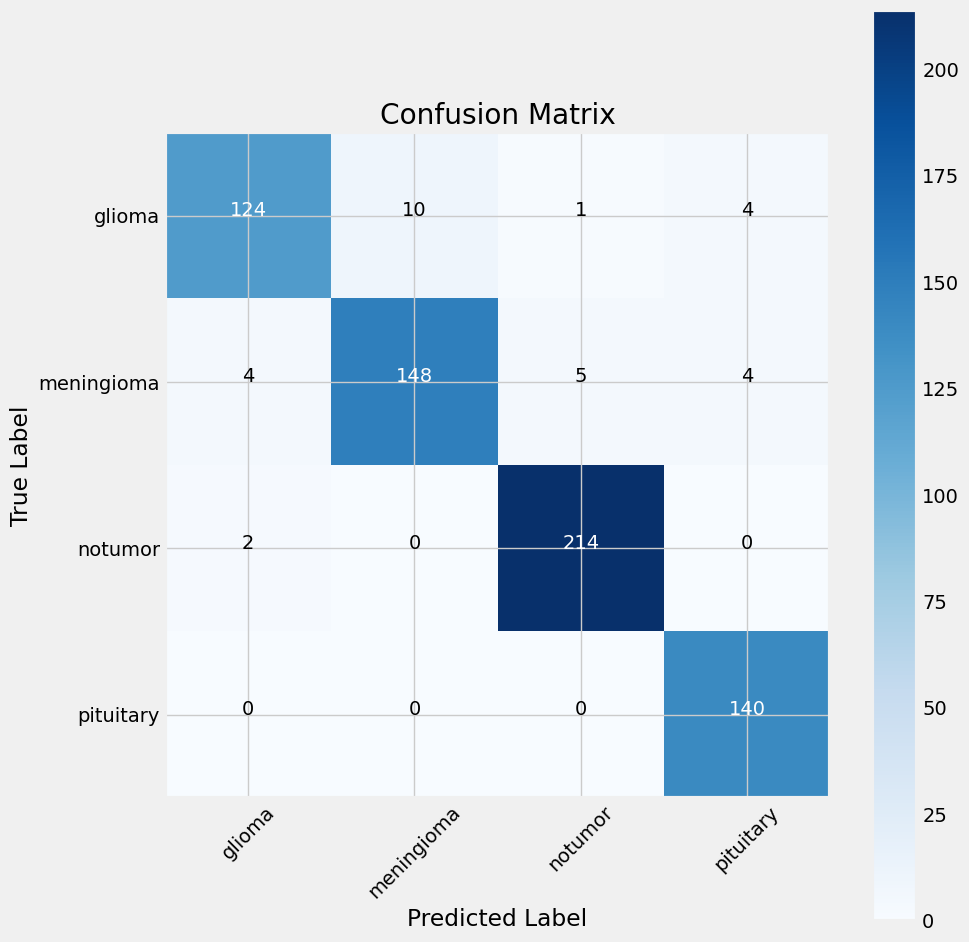

In [20]:
g_dict = test_genrator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_genrator.classes, y_pred)
cm
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [21]:
def plot_sample_predictions(model, test_generator, categories, test_dir, num_samples=9, figsize=(12, 8)):
    """
    Nice display of prediction samples to see CNN predictions
    for classification.
    """
    # Make predictions on the test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Randomly sample test images
    test_images = np.array(test_generator.filepaths)
    sample_indices = np.random.choice(len(test_images), size=num_samples, replace=False)
    sample_images = test_images[sample_indices]
    sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
    sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

    # Plot sample images with their predicted and true labels
    plt.figure(figsize=figsize)

    # Loop over samples
    for i, image_path in enumerate(sample_images):
        # Form subplot and plot
        plt.subplot(3, 3, i + 1)
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis("off")

        # Set axis label color depending on correct prediction or not
        prediction_color = 'green' if sample_predictions[i] == sample_true_labels[i] else 'red'
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color=prediction_color)

    plt.tight_layout()
    plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


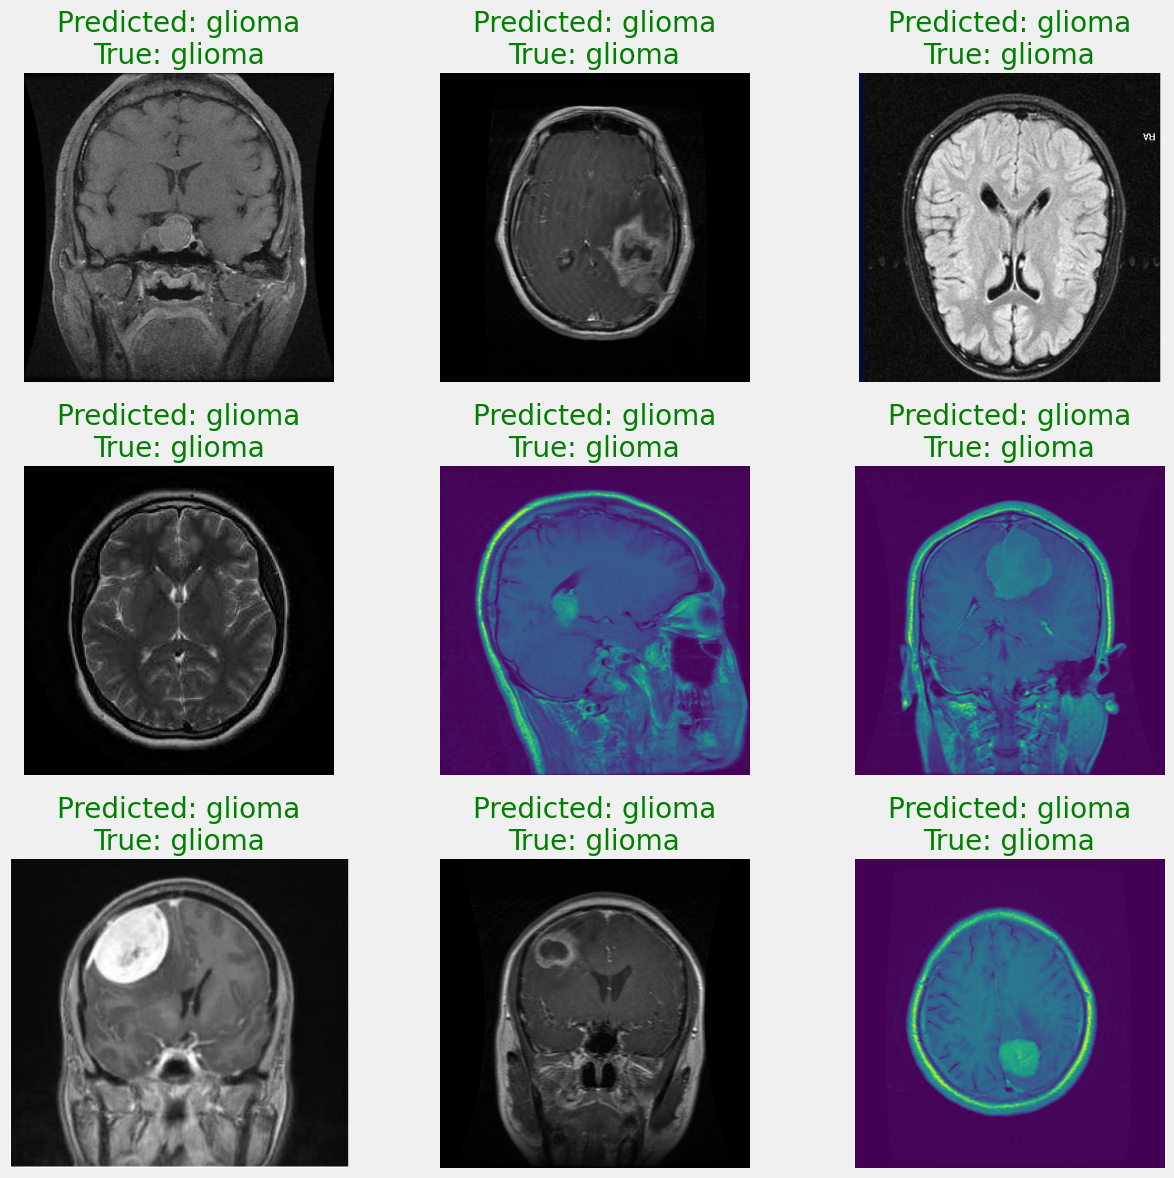

In [22]:
# Accessing class indices for training data generator

# Using functions in 6.1 for showing results
plot_sample_predictions(model=model,
                        test_generator=test_genrator,
                        categories=ts_df['labels'],
                        test_dir=test_data,
                        num_samples=9,
                        figsize=(13, 12))

# Improving Architecture

### Experiment with focal loss

In [23]:
from tensorflow.keras import backend as K

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * y_true * K.pow(1 - y_pred, gamma)
        return K.sum(weight * cross_entropy, axis=-1)
    return loss

model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

### Transfer Learning with Pre-trained Models

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(class_count, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Hyperparameter Tuning with Learning Rate Scheduler

In [25]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9  # Reduce by 10% after 5 epochs

lr_callback = LearningRateScheduler(scheduler)

history = model.fit(train_genrator, epochs=20, validation_data=valid_genrator, callbacks=[lr_callback])

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.7310 - loss: 11.5937 - val_accuracy: 0.8656 - val_loss: 0.4237 - learning_rate: 0.0010
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8215 - loss: 0.4938 - val_accuracy: 0.8840 - val_loss: 0.4851 - learning_rate: 0.0010
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8511 - loss: 0.4278 - val_accuracy: 0.8687 - val_loss: 0.2590 - learning_rate: 0.0010
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8641 - loss: 0.3883 - val_accuracy: 0.8916 - val_loss: 0.2828 - learning_rate: 0.0010
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8559 - loss: 0.3654 - val_accuracy: 0.9115 - val_loss: 0.2501 - learning_rate: 0.0010
Epoch 6/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8771 - loss: 0.3409 - val_accuracy: 0.9237 - val_loss: 0.2191 - learning_rate: 9.0000e-04
Epoch 7/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.884

### Enhanced Data Augmentation

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=image_size, batch_size=batch_size, class_mode='categorical'
)

Found 5712 validated image filenames belonging to 4 classes.


### Add Batch Normalization

In [28]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(class_count, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Handling Class Imbalance

In [29]:
class_weights = {0: 1.0, 1: 2.0, 2: 1.5, 3: 1.2}  # Example weights based on imbalance
history = model.fit(train_genrator, epochs=20, validation_data=valid_genrator, class_weight=class_weights)

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.5758 - loss: 44.6791 - val_accuracy: 0.4076 - val_loss: 2.2498
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.4381 - loss: 2.5208 - val_accuracy: 0.3405 - val_loss: 1.1546
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3947 - loss: 1.8526 - val_accuracy: 0.4000 - val_loss: 1.1850
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.4213 - loss: 1.8286 - val_accuracy: 0.3099 - val_loss: 1.5417
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.4006 - loss: 2.2433 - val_accuracy: 0.4122 - val_loss: 1.1284
Epoch 6/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.4028 - loss: 2.1211 - val_accuracy: 0.3771 - val_loss: 1.4349
Epoch 7/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3789 - loss: 2.2765 - val_accuracy: 0.3634 - val_loss: 1.2809
Epoch 8/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3691 - loss: 1.8806 -

### Evaluate with K-Fold Cross-Validation

In [30]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kfold.split(train_df['filepaths'], train_df['labels']):
    train_gen = ImageDataGenerator().flow_from_dataframe(
        train_df.iloc[train_idx], x_col='filepaths', y_col='labels', target_size=image_size, batch_size=batch_size, class_mode='categorical'
    )
    val_gen = ImageDataGenerator().flow_from_dataframe(
        train_df.iloc[val_idx], x_col='filepaths', y_col='labels', target_size=image_size, batch_size=batch_size, class_mode='categorical'
    )
    model.fit(train_gen, validation_data=val_gen, epochs=10)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.3436 - loss: 1.3097 - val_accuracy: 0.4768 - val_loss: 1.3273
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.3748 - loss: 1.2923 - val_accuracy: 0.4462 - val_loss: 1.0828
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4131 - loss: 1.1523 - val_accuracy: 0.4663 - val_loss: 1.0450
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.4073 - loss: 1.2109 - val_accuracy: 0.4077 - val_loss: 1.1701
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.3788 - loss: 1.2210 - val_accuracy: 0.4803 - val_loss: 1.1032
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3889 - loss: 1.5012 - val_accuracy: 0.4042 - val_loss: 1.1468
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3635 - loss: 1.2533 - val_accu